## Setup and imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

## Load game data

In [2]:
def extract_number(p):
    n = re.search(r'\d|$', p).group()
    return 0 if n == '' else int(n)

df = pd.read_csv("game.csv")
two_third_avg = 2*df['pick'].mean()/3
win_number = np.rint([two_third_avg])[0]

## Cleanse and categorize

In [3]:
# assign winner column
two_third_avg = 2*df['pick'].mean()/3
win_number = np.rint([two_third_avg])[0]
df['winner'] = df['pick'].apply(lambda p: 'Yes' if p == win_number else 'No')    
# assign check_anwser column
df['check_answer'] = df['check_two_thirds'].apply(extract_number)
# fix player 38's check answer
df.iloc[37, 6] = 7
# assign rationality column
df['rationality'] = df.apply(lambda r: 'irrational' if r["want_win"] == 'No' else 'quasi-rational' if r["check_answer"] == 7 else 'semi-rational', axis=1)

# flag rational player with iterative thinking, which are reviewed manually by looking at the reason they gave
df.iloc[15, 7] = 'rational'
df.iloc[31, 7] = 'rational'
df.iloc[35, 7] = 'rational'
df.iloc[37, 7] = 'rational'


In [5]:
df

,ID,want_win,pick,check_two_thirds,reason,winner,check_answer,rationality
0,1,Yes,4,6,"If people are likely to choose 6, 4 is 2/3rds ...",No,6,semi-rational
1,2,Yes,10,8,blind guess,No,8,semi-rational
2,3,Yes,4,9,Fav number,No,9,semi-rational
3,4,Yes,7,"7, it's a lucky number",Cause I'm competitive,No,7,quasi-rational
4,5,No,9,9,9 is my lucky number.,No,9,irrational
5,6,Yes,1,To be number one,You can win if you want,No,0,semi-rational
6,7,Yes,7,7,my favorite number,No,7,quasi-rational
7,8,Yes,2,"6, its closest to 2/3 of the average (10 in th...",i think the average will be lower than i initi...,No,6,semi-rational
8,9,Yes,7,10,Because I want the extra marks,No,1,semi-rational
9,10,Yes,7,I would not choose 10 because I could stand ou...,I chose 7 originally because it is a high numb...,No,1,semi-rational


## Visualize the game data using scatter plot

In [4]:
# set `size` and `color` column for data visualization
def rational_size(rationality):
    base = 30
    if rationality == 'irrational':
        return base * 1
    elif rationality == 'semi-rational':
        return base * 2
    elif rationality == 'quasi-rational':
        return base * 6
    else:
        return base * 10
        
df['size'] = df.apply(lambda r: rational_size(r["rationality"]), axis=1)
df['color'] = df.apply(lambda r: 'gold' if r["winner"] == 'Yes' else 'purple', axis=1)


In [7]:
df.query("winner == 'Yes' and check_answer == 7")

,ID,want_win,pick,check_two_thirds,reason,winner,check_answer,rationality,size,color
17,18,Yes,3,"7, if everyone else chose 10, 2/3rds of the av...",I choose 3 as it is approximately 2/3rds of 5 ...,Yes,7,quasi-rational,180,gold
27,28,Yes,3,7 There are 7 days in a week. 7 colours in the...,3 and 7 are odd and primes. And 3 is quite sma...,Yes,7,quasi-rational,180,gold
36,37,Yes,3,"7. When everyone else chooses 10, the average ...","When everyone chooses 10, the average is 10, a...",Yes,7,quasi-rational,180,gold


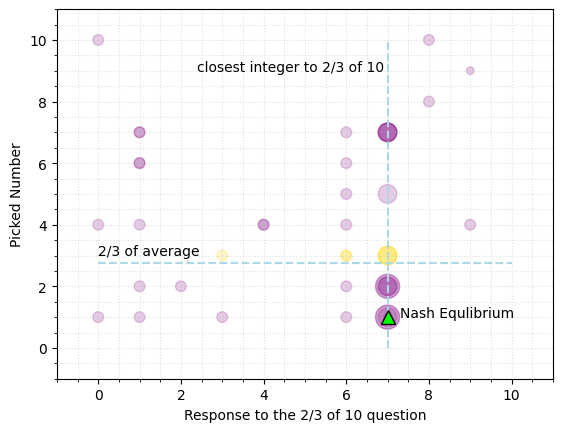

In [5]:

fig, ax = plt.subplots()
ax.set_xlabel(r'Response to the 2/3 of 10 question')
ax.set_ylabel(r'Picked Number')
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)

# Change major ticks to show every 2.
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 0.5.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# And a corresponding grid
ax.grid(which='both', linestyle=':', alpha=0.4)

plt.scatter(df['check_answer'], df['pick'], c=df['color'], s=df['size'], alpha=0.2)
plt.plot(np.linspace(0, 10, 100), np.linspace(two_third_avg, two_third_avg, 100), c= "lightblue", marker='', linestyle='--')
plt.plot(np.linspace(7, 7, 100), np.linspace(0, 10, 100), c = "lightblue", marker='', linestyle='--')
#ax.plot([7], [1], '^', markersize=15, markeredgewidth='0.8', markerfacecolor='none')
ax.plot([7], [1], '^', markersize=10, markeredgecolor='black', markerfacecolor='lime')
ax.text(0, 3, '2/3 of average')
ax.text(2.4, 9, 'closest integer to 2/3 of 10')
ax.text(7.3, 1, 'Nash Equlibrium')

plt.show()